In [18]:
!pip install seaborn

You should consider upgrading via the '/usr/bin/python3 -m pip install --upgrade pip' command.


In [19]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sb
import json
import pandas as pd

In [125]:
gpu_times_files = [
    ('four_gpu','../../timing_info/resnet/four_gpu/resnet_four_gpu_cifar10_lrsch.json'),
    ('three_gpu','../../timing_info/resnet/three_gpu/resnet_three_gpu_cifar10_lrsch.json'),
    ('two_gpu','../../timing_info/resnet/two_gpu/resnet_two_gpu_cifar10_lrsch.json'),
    ('one_gpu','../../timing_info/resnet/one_gpu/resnet_cifar10_lrsch.json')
]

gpu_times = []

for file in gpu_times_files:
    with open(file[1], 'r') as f:
        gpu_times.append((file[0], json.load(f)))

        
for i in range(16):
    for j in range(len(gpu_times)):
        gpu_times[j][1][i]['delta'] = gpu_times[j][1][i]['run_time'] - gpu_times[3][1][i]['run_time']
        
data_frame_dict = {'run': [], 'layer': [], 'runtime': [], 'rank': [], 'total_time': [], 'delta': []}

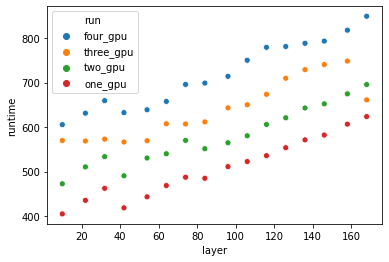

In [127]:
for run in gpu_times:
    total_time = run[1][-1]
    for layer in run[1][:-1:]:
        data_frame_dict['run'].append(run[0])
        data_frame_dict['layer'].append(layer['layer'])
        data_frame_dict['runtime'].append(layer['run_time'])
        data_frame_dict['rank'].append(layer['rank'])
        data_frame_dict['total_time'].append(total_time['total_time'])
        data_frame_dict['delta'].append(layer['delta'])
        

df = pd.DataFrame(data=data_frame_dict)

sb.scatterplot(x="layer", y="runtime", hue="run", data=df)

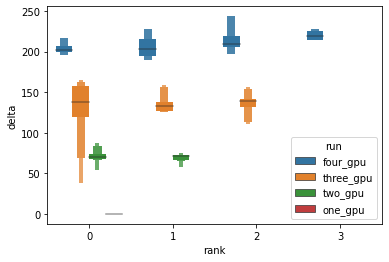

In [130]:
sb.boxenplot(x='rank', y='delta', hue="run", data=df)

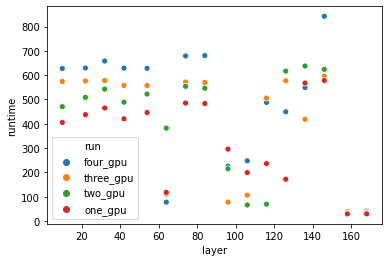

In [5]:
gpu_times_files = [
    ('four_gpu','../../timing_info/resnet/four_gpu/resnet_four_gpu_cifar10_lrsch_earlystop.json'),
    ('three_gpu','../../timing_info/resnet/three_gpu/resnet_three_gpu_cifar10_lrsch_earlystop.json'),
    ('two_gpu','../../timing_info/resnet/two_gpu/resnet_two_gpu_cifar10_lrsch_earlystop.json'),
    ('one_gpu','../../timing_info/resnet/one_gpu/resnet_cifar10_lrsch_earlystop.json')
]

gpu_times = []

for file in gpu_times_files:
    with open(file[1], 'r') as f:
        gpu_times.append((file[0], json.load(f)))

data_frame_dict = {'run': [], 'layer': [], 'runtime': [], 'rank': [], 'total_time': []}

for run in gpu_times:
    total_time = run[1][-1]
    for layer in run[1][:-1:]:
        data_frame_dict['run'].append(run[0])
        data_frame_dict['layer'].append(layer['layer'])
        data_frame_dict['runtime'].append(layer['run_time'])
        data_frame_dict['rank'].append(layer['rank'])
        data_frame_dict['total_time'].append(total_time['total_time'])

df = pd.DataFrame(data=data_frame_dict)

sb.scatterplot(x="layer", y="runtime", hue="run", data=df)